CNN for CIFAR10 (https://www.tensorflow.org/tutorials/images/cnn)

In [1]:
import gzip
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt

import tensorflow as tf
import pandas as pd

from sklearn.utils import shuffle

from keras.utils import to_categorical

from tensorflow.keras import datasets

In [2]:
(X, y), (X_te, y_te) = datasets.cifar10.load_data()
X, X_te = X / 255.0, X_te / 255.0

In [3]:
model = tf.keras.Sequential([
#         tf.keras.layers.Flatten(input_shape=shape),
        tf.keras.layers.InputLayer(input_shape=[32, 32, 3]),
        
        # first hidden layer
        tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'),  # , padding="same"
#         tf.keras.layers.BatchNormalization(),
#         tf.keras.layers.Activation('relu'),
        tf.keras.layers.MaxPool2D(pool_size=2),
        
        # second hidden layer
        tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu'),
#         tf.keras.layers.BatchNormalization(),
#         tf.keras.layers.Activation('relu'),
        tf.keras.layers.MaxPool2D(pool_size=2),
    
        # third hidden layer
        tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu'),
#         tf.keras.layers.BatchNormalization(),
#         tf.keras.layers.Activation('relu'),
#         tf.keras.layers.MaxPool2D(pool_size=2),

    
        # fourth hidden layer
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(units=64, activation='relu'),
#         tf.keras.layers.BatchNormalization(),
#         tf.keras.layers.Activation('relu'),

    
        # output layer
        tf.keras.layers.Dense(units=10)  # , activation=tf.nn.softmax
        ])


In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

In [5]:
model.compile(optimizer='adam', 
                loss= tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True) ,
                metrics=['accuracy'])

In [6]:
history = model.fit(X, y, epochs=10, 
                    validation_data=(X_te, y_te))

Epoch 1/10
1563/1563 [==============================] - 23s 7ms/step - loss: 1.5278 - accuracy: 0.4445 - val_loss: 1.2600 - val_accuracy: 0.5468
Epoch 2/10
1563/1563 [==============================] - 10s 7ms/step - loss: 1.1740 - accuracy: 0.5839 - val_loss: 1.1348 - val_accuracy: 0.5947
Epoch 3/10
1563/1563 [==============================] - 10s 7ms/step - loss: 1.0362 - accuracy: 0.6334 - val_loss: 1.0011 - val_accuracy: 0.6504
Epoch 4/10
1563/1563 [==============================] - 10s 7ms/step - loss: 0.9475 - accuracy: 0.6680 - val_loss: 0.9612 - val_accuracy: 0.6610
Epoch 5/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.8761 - accuracy: 0.6916 - val_loss: 1.0375 - val_accuracy: 0.6368
Epoch 6/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.8156 - accuracy: 0.7151 - val_loss: 1.0407 - val_accuracy: 0.6410
Epoch 7/10
1563/1563 [==============================] - 10s 7ms/step - loss: 0.7743 - accuracy: 0.7266 - val_loss: 0.9422 - val_ac

313/313 - 1s - loss: 0.8759 - accuracy: 0.7047 - 997ms/epoch - 3ms/step


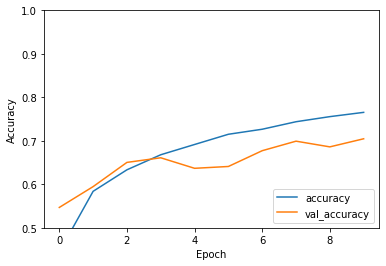

In [7]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(X_te,  y_te, verbose=2)